<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_1_2_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_1.2_n20.csv',
 'data_add_delta_1.2_n30.csv',
 'data_add_delta_1.2_n60.csv',
 'data_add_delta_1.2_n120.csv',
 'data_add_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.915129,65.383993,98.048963,-76.961399,123.386686,208.531964,-85.145277
1,0.0,1.0,75.151733,91.088895,83.002512,-92.749573,166.493567,237.862874,-71.369307
2,0.0,2.0,50.393307,21.086719,34.630288,-48.761197,67.349117,116.696017,-49.346900
3,0.0,3.0,75.935760,38.568767,95.557633,66.562267,286.624427,224.125197,62.499229
4,0.0,4.0,30.686141,56.583076,30.774693,-73.572272,54.471637,118.519623,-64.047986
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,29.103965,43.658495,87.183896,-45.870531,124.075824,148.291816,-24.215992
119996,999.0,116.0,80.841848,44.260942,49.916034,45.176390,230.195214,185.959403,44.235811
119997,999.0,117.0,31.952020,58.807450,25.826105,-250.323815,-123.738240,94.348602,-218.086842
119998,999.0,118.0,37.795117,88.847997,91.222216,-402.553842,-174.688512,249.270622,-423.959133


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.915129,65.383993,98.048963,-76.961399,123.386686,208.531964,-85.145277
1,0.0,1.0,75.151733,91.088895,83.002512,-92.749573,166.493567,237.862874,-71.369307
2,0.0,2.0,50.393307,21.086719,34.630288,-48.761197,67.349117,116.696017,-49.346900
3,0.0,3.0,75.935760,38.568767,95.557633,66.562267,286.624427,224.125197,62.499229
4,0.0,4.0,30.686141,56.583076,30.774693,-73.572272,54.471637,118.519623,-64.047986
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,29.103965,43.658495,87.183896,-45.870531,124.075824,148.291816,-24.215992
119996,999.0,116.0,80.841848,44.260942,49.916034,45.176390,230.195214,185.959403,44.235811
119997,999.0,117.0,31.952020,58.807450,25.826105,-250.323815,-123.738240,94.348602,-218.086842
119998,999.0,118.0,37.795117,88.847997,91.222216,-402.553842,-174.688512,249.270622,-423.959133


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    26.915129  65.383993  ...  208.531964  -85.145277
      1.0    75.151733  91.088895  ...  237.862874  -71.369307
      2.0    50.393307  21.086719  ...  116.696017  -49.346900
      3.0    75.935760  38.568767  ...  224.125197   62.499229
      4.0    30.686141  56.583076  ...  118.519623  -64.047986
...                ...        ...  ...         ...         ...
999.0 115.0  29.103965  43.658495  ...  148.291816  -24.215992
      116.0  80.841848  44.260942  ...  185.959403   44.235811
      117.0  31.952020  58.807450  ...   94.348602 -218.086842
      118.0  37.795117  88.847997  ...  249.270622 -423.959133
      119.0  85.270548  53.702190  ...  269.253086   -5.719198

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    26.915129  65.383993  ...  208.531964  -85.145277
      1.0    75.151733  91.088895  ...  237.862874  -71.369307
      2.0    50.393307  21.086719  ...  116.696017  -49.346900
      3.0    75.935760  38.568767  ...  224.125197   62.499229
      4.0    30.686141  56.583076  ...  118.519623  -64.047986
...                ...        ...  ...         ...         ...
999.0 115.0  29.103965  43.658495  ...  148.291816  -24.215992
      116.0  80.841848  44.260942  ...  185.959403   44.235811
      117.0  31.952020  58.807450  ...   94.348602 -218.086842
      118.0  37.795117  88.847997  ...  249.270622 -423.959133
      119.0  85.270548  53.702190  ...  269.253086   -5.719198

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.915129,65.383993,98.048963,-76.961399,123.386686,208.531964,-85.145277
1,0.0,1.0,75.151733,91.088895,83.002512,-92.749573,166.493567,237.862874,-71.369307
2,0.0,2.0,50.393307,21.086719,34.630288,-48.761197,67.349117,116.696017,-49.346900
3,0.0,3.0,75.935760,38.568767,95.557633,66.562267,286.624427,224.125197,62.499229
4,0.0,4.0,30.686141,56.583076,30.774693,-73.572272,54.471637,118.519623,-64.047986
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,29.103965,43.658495,87.183896,-45.870531,124.075824,148.291816,-24.215992
119996,999.0,116.0,80.841848,44.260942,49.916034,45.176390,230.195214,185.959403,44.235811
119997,999.0,117.0,31.952020,58.807450,25.826105,-250.323815,-123.738240,94.348602,-218.086842
119998,999.0,118.0,37.795117,88.847997,91.222216,-402.553842,-174.688512,249.270622,-423.959133


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    26.915129  65.383993  ...  208.531964  -85.145277
      1.0    75.151733  91.088895  ...  237.862874  -71.369307
      2.0    50.393307  21.086719  ...  116.696017  -49.346900
      3.0    75.935760  38.568767  ...  224.125197   62.499229
      4.0    30.686141  56.583076  ...  118.519623  -64.047986
...                ...        ...  ...         ...         ...
999.0 115.0  29.103965  43.658495  ...  148.291816  -24.215992
      116.0  80.841848  44.260942  ...  185.959403   44.235811
      117.0  31.952020  58.807450  ...   94.348602 -218.086842
      118.0  37.795117  88.847997  ...  249.270622 -423.959133
      119.0  85.270548  53.702190  ...  269.253086   -5.719198

[120000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

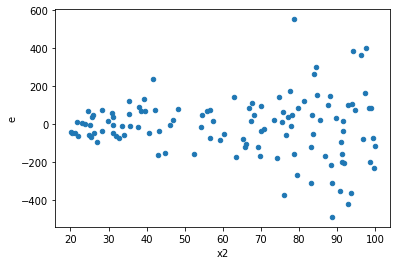

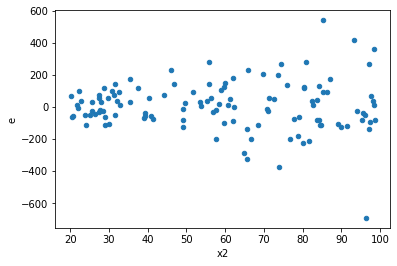

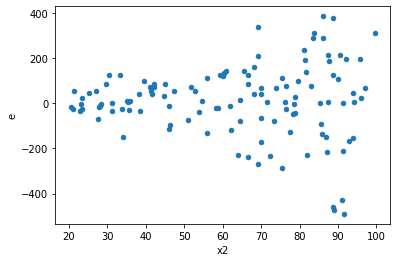

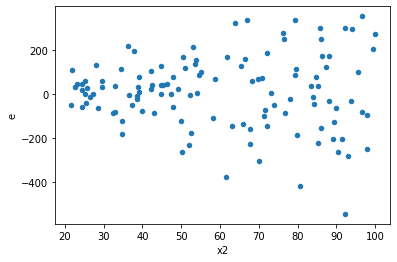

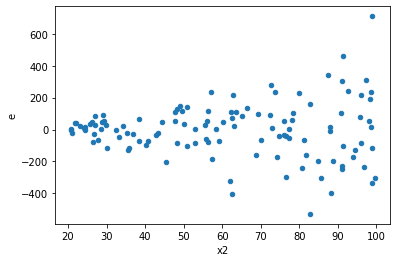

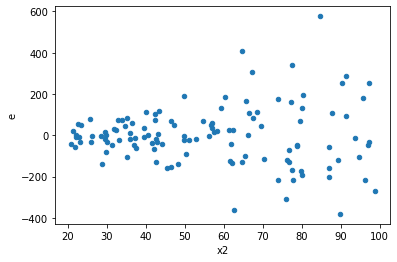

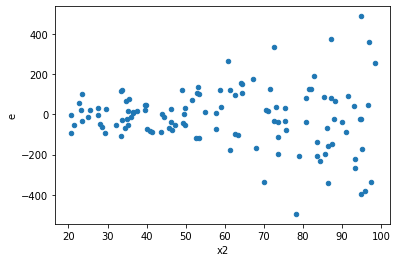

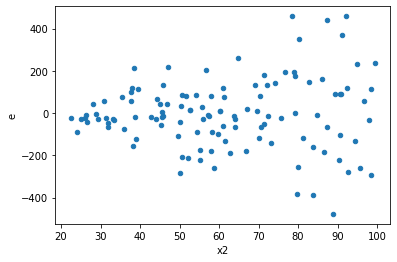

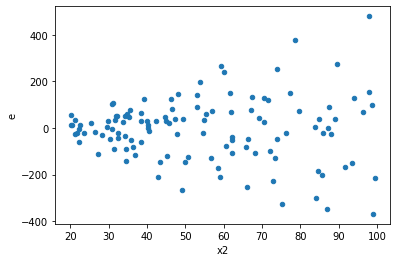

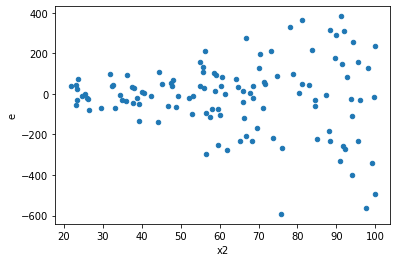

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,45.0,45.0,2314883.554223202,263300.8282640536,52610.98986870914,5984.1097332739455,8.79178227233566,2.3240520619083327e-11,0.9999999999883797,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,1792723.17322452,309239.74446905777,40743.708482375456,7028.176010660404,5.797195235374727,3.015098282155293e-08,0.9999999849245086,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,2119807.1760440753,202302.40988386038,48177.43581918353,4597.782042815009,10.478407930291258,9.123812816369536e-13,0.9999999999995438,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,1976730.7616057016,352959.94296950346,44925.69912740231,8021.816885670533,5.600439372737817,5.2596888178157997e-08,0.9999999737015559,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,2630557.8539670133,251384.53393448112,59785.405771977574,5713.284862147299,10.464278819366912,9.35695965154082e-13,0.9999999999995322,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,2006865.9088296513,155260.3833139978,45610.58883703753,3528.6450753181316,12.925808026449193,1.6653345369377348e-14,0.9999999999999917,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,1854964.843206325,154980.1555801951,42158.291891052846,3522.2762631862524,11.969047496835595,7.30526750203353e-14,0.9999999999999635,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,2208866.8888162905,450131.73860532156,50201.520200370236,10230.26678648458,4.907156504138535,4.161407618497037e-07,0.9999997919296191,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,1546449.3254607131,200931.333819458,35146.57557865257,4566.6212231695,7.6964070066356,2.499305207237512e-10,0.9999999998750347,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,2314883.554223202,263300.8282640536,52610.98986870914,5984.1097332739455,8.79178227233566,2.3240520619083327e-11,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,1792723.17322452,309239.74446905777,40743.708482375456,7028.176010660404,5.797195235374727,3.015098282155293e-08,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,2119807.1760440753,202302.40988386038,48177.43581918353,4597.782042815009,10.478407930291258,9.123812816369536e-13,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,1976730.7616057016,352959.94296950346,44925.69912740231,8021.816885670533,5.600439372737817,5.2596888178157997e-08,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,2630557.8539670133,251384.53393448112,59785.405771977574,5713.284862147299,10.464278819366912,9.35695965154082e-13,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,2006865.9088296513,155260.3833139978,45610.58883703753,3528.6450753181316,12.925808026449193,1.6653345369377348e-14,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,1854964.843206325,154980.1555801951,42158.291891052846,3522.2762631862524,11.969047496835595,7.30526750203353e-14,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,2208866.8888162905,450131.73860532156,50201.520200370236,10230.26678648458,4.907156504138535,4.161407618497037e-07,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,1546449.3254607131,200931.333819458,35146.57557865257,4566.6212231695,7.6964070066356,2.499305207237512e-10,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64